In [3]:
import networkx as nx
import matplotlib.pyplot as plt
# Load the network data
file_path = 'data/netscience.gml'
G = nx.read_gml(file_path)

largest_cc = max(nx.connected_components(G), key=len)
G_largest = G.subgraph(largest_cc).copy()

num_nodes = G_largest.number_of_nodes()
num_edges = G_largest.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


Number of nodes: 379
Number of edges: 914


In [4]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G_largest)
betweenness_centrality = nx.betweenness_centrality(G_largest)
closeness_centrality = nx.closeness_centrality(G_largest)

# Add centrality measures to node attributes
nx.set_node_attributes(G_largest, degree_centrality, 'degree_centrality')
nx.set_node_attributes(G_largest, betweenness_centrality, 'betweenness_centrality')
nx.set_node_attributes(G_largest, closeness_centrality, 'closeness_centrality')

In [5]:
from networkx.algorithms.community import greedy_modularity_communities

communities = greedy_modularity_communities(G_largest)
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

nx.set_node_attributes(G_largest, community_map, 'community')

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

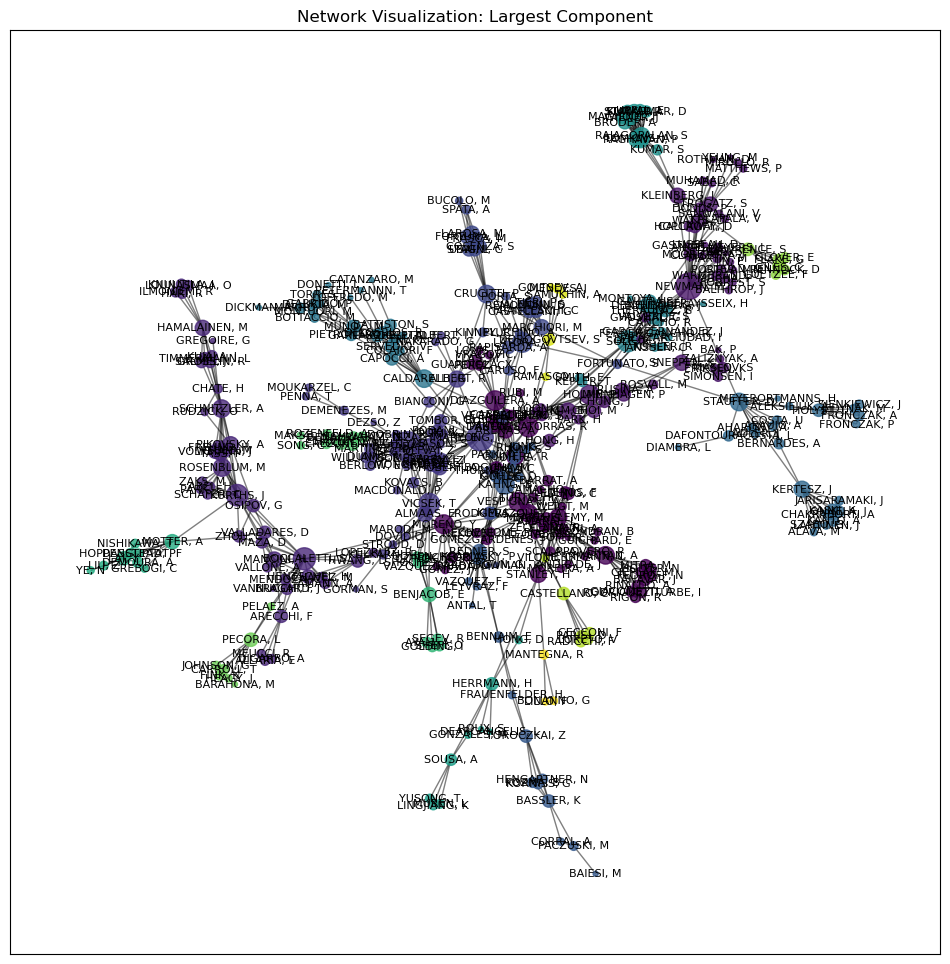

In [6]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_largest)

node_colors = [community_map[node] for node in G_largest.nodes()]

node_sizes = [5000 * degree_centrality[node] for node in G_largest.nodes()]

nx.draw_networkx_nodes(G_largest, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, alpha=0.8)
nx.draw_networkx_edges(G_largest, pos, alpha=0.5)
nx.draw_networkx_labels(G_largest, pos, font_size=8, font_color='black')

plt.title('Network Visualization: Largest Component')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Community')
plt.show()


In [ ]:
#Observations
#The biggest part of the network shows some interesting patterns:
#Central Nodes: The nodes that have a lot of connections (bigger sizes) are usually in the center, showing they are important hubs.
#Community Structure: The network has clear clusters of nodes, showing different groups within the largest part. This means that nodes within the same group are more connected to each other than to nodes in other groups.
#Visual Clarity: Using colors to represent groups and sizes to show how connected each node is makes the visualization clear and easy to understand. It helps in quickly identifying important nodes and the structure of different groups.
#This visualization gives a good overall picture of the network's layout, showing the key nodes and how the network is organized into different communities.

In [ ]:
import numpy as np
import random

def initialize_network(m):
    G = {i: set(j for j in range(m) if j != i) for i in range(m)}
    return G

def add_node(G, m):
    new_node = len(G)
    node_degrees = {node: len(neighbors) for node, neighbors in G.items()}
    total_degree = sum(node_degrees.values())
    nodes, degrees = zip(*node_degrees.items())
    probabilities = [degree / total_degree for degree in degrees]
    
    chosen_nodes = np.random.choice(nodes, size=m, replace=False, p=probabilities)
    G[new_node] = set(chosen_nodes)
    for node in chosen_nodes:
        G[node].add(new_node)

def generate_barabasi_albert(N, m):
    G = initialize_network(m)
    for _ in range(m, N):
        add_node(G, m)
    return G

def degree_distribution(G):
    degree_count = {}
    for node, neighbors in G.items():
        degree = len(neighbors)
        if degree in degree_count:
            degree_count[degree] += 1
        else:
            degree_count[degree] = 1
    return degree_count

def average_clustering_coefficient(G):
    triangles = 0
    triplets = 0
    for node in G:
        neighbors = G[node]
        if len(neighbors) < 2:
            continue
        triplets += len(neighbors) * (len(neighbors) - 1) / 2
        for neighbor in neighbors:
            common_neighbors = G[neighbor].intersection(neighbors)
            triangles += len(common_neighbors)
    return triangles / triplets if triplets > 0 else 0

N = 10000
m = 4
G = generate_barabasi_albert(N, m)

steps = [100, 1000, 10000]
degree_distributions = []

for step in steps:
    G_step = generate_barabasi_albert(step, m)
    degree_distributions.append(degree_distribution(G_step))

plt.figure(figsize=(15, 5))
for i, step in enumerate(steps):
    degrees, counts = zip(*sorted(degree_distributions[i].items()))
    plt.subplot(1, 3, i+1)
    plt.plot(degrees, counts, 'b.')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.title(f'Degree Distribution at {step} nodes')
plt.tight_layout()
plt.show()

In [ ]:
def average_clustering_coefficient_optimized(G, m):
    clustering_coefficients = []
    
    def clustering_coefficient(node):
        neighbors = G[node]
        if len(neighbors) < 2:
            return 0
        links = 0
        for neighbor in neighbors:
            links += len(neighbors.intersection(G[neighbor]))
        return links / (len(neighbors) * (len(neighbors) - 1))
    
    for step in range(m, N + 1):
        if step % 100 == 0 or step == N:
            clustering_sum = sum(clustering_coefficient(node) for node in G)
            average_clustering = clustering_sum / len(G)
            clustering_coefficients.append((step, average_clustering))
        add_node(G, m)
    
    return clustering_coefficients

G = initialize_network(m)

clustering_data = average_clustering_coefficient_optimized(G, m)

steps, coefficients = zip(*clustering_data)

plt.figure(figsize=(10, 6))
plt.plot(steps, coefficients)
plt.xlabel('Number of Nodes (N)')
plt.ylabel('Average Clustering Coefficient')
plt.title('Average Clustering Coefficient as a Function of N')
plt.show()

In [ ]:
initial_nodes_degrees = {node: [] for node in range(m)}

G = initialize_network(m)
for t in range(m, N):
    add_node(G, m)
    for node in range(m):
        initial_nodes_degrees[node].append(len(G[node]))

plt.figure(figsize=(10, 6))
for node in range(m):
    plt.plot(range(1, N - m + 1), initial_nodes_degrees[node], label=f'Node {node}')
plt.xlabel('Time Step (t)')
plt.ylabel('Degree')
plt.title('Degree Growth of Initial Nodes')
plt.legend()
plt.show()


In [ ]:
#Network Robustness
#a. Robustness to Random Failures

#A random network, like the Erdos-Renyi network, is made by connecting nodes randomly. In a scale-free network, like the Barabási-Albert network, some nodes (hubs) have a lot more connections than others.
#When it comes to random failures (like nodes failing randomly), scale-free networks are more robust.
#This is because even if a few nodes fail, it's likely that most of the hubs (which hold the network together) will still be okay, so the network can still function well.
#On the other hand, in a random network, the connections are more evenly spread out, so losing nodes randomly can break the network into pieces more easily.

#b. Robustness to Targeted Attacks Things change when we consider targeted attacks (intentionally attacking the most connected nodes).

#In this case, scale-free networks are more vulnerable. If attackers target the hubs in a scale-free network, the network can quickly fall apart because those hubs are crucial for keeping everything connected.
#In a random network, even though it's also bad to lose highly connected nodes, the overall structure doesn't rely as much on just a few nodes, so it doesn't break down as easily.

#So, to sum it up:

#Random Failures: Scale-free networks are more robust.
#Targeted Attacks: Scale-free networks are more vulnerable.